Detected labels for busy roads.jpg

Label: Person
Confidence: 99.49266815185547

Label: Bicycle
Confidence: 98.99691009521484

Label: Vehicle
Confidence: 98.99691009521484

Label: Truck
Confidence: 98.08560180664062

Label: Traffic Light
Confidence: 97.31024169921875

Label: Bus
Confidence: 97.00897979736328

Label: Moving Van
Confidence: 95.9243392944336

Label: Shoe
Confidence: 93.17137908935547

Label: Boarding
Confidence: 86.51419830322266

Label: Handbag
Confidence: 86.10273742675781



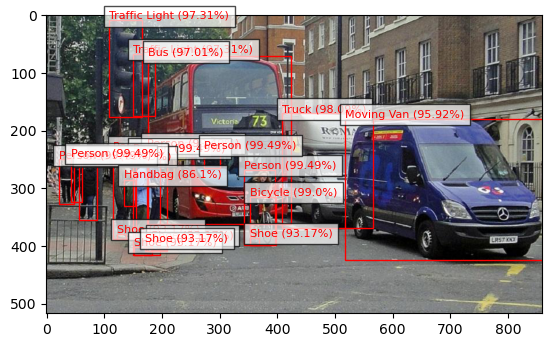

Labels detected: 10


In [5]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO

def detect_labels(photo, bucket):
    client = boto3.client('rekognition')

    response = client.detect_labels(
        Image={'S3Object': {'Bucket': bucket, 'Name': photo}},
        MaxLabels=10)

    print('Detected labels for ' + photo) 
    print()   

    # Print label information
    for label in response['Labels']:
        print("Label:", label['Name'])
        print("Confidence:", label['Confidence'])
        print()

    # Load the image from S3
    s3 = boto3.resource('s3')
    obj = s3.Object(bucket, photo)
    img_data = obj.get()['Body'].read()
    img = Image.open(BytesIO(img_data))

    # Display the image
    plt.imshow(img)
    ax = plt.gca()

    # Plot bounding boxes
    for label in response['Labels']:
        for instance in label.get('Instances', []):
            bbox = instance['BoundingBox']
            left = bbox['Left'] * img.width
            top = bbox['Top'] * img.height
            width = bbox['Width'] * img.width
            height = bbox['Height'] * img.height

            rect = patches.Rectangle((left, top), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

            label_text = label['Name'] + ' (' + str(round(label['Confidence'], 2)) + '%)'
            plt.text(left, top - 2, label_text, color='r', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

    plt.show()

    return len(response['Labels'])

def main():
    photo = 'busy roads.jpg'
    bucket = 'aws-rekognition-bucket-1234'
    label_count = detect_labels(photo, bucket)
    print("Labels detected:", label_count)

if __name__ == "__main__":
    main()